In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv ('/content/gdrive/MyDrive/PRAK DATA MINING/pertemuan 6/mahasiswa.csv')
df

No         NIM               Nama  Jumlah SKS  Nilai TBQ
0    1  1300018177        Ani Yuanita         109         70
1    2  1300018188    Burhan Fajar P.          89         75
2    3  1300018200     Heri Budiyanto         120         65
3    4  1300018201    Dimas Satrio W.         111         60
4    5  1300019200        Nur Hidayat         100         50
5    6  1300019181      Vilda Lestari          90         55
6    7  1300018198       Edi Suryanto          98         60
7    8  1300019001   Erna Dwi Puspita          70         75
8    9  1300022099         Nurfita FF          63         80
9   10  1300015006       Fahmi dwi N.          84         60
10  11  1300023046    Hamzah Pramudya         102         68
11  12  1300023143           Nurcahyo         110         70
12  13  1300023200        Aminatun R.         110         75
13  14  1300022080       Tri Haryanto         124         68
14  15     9018263  Irma Kautsaril Q.         120         65
15  16    12022030        Risna Dania         115         68
16  17    12020021      Ageng Priyono         116         80
17  18     9018269       Reny Surya P          98         70
18  19     9018109   Layly Aslinda S.         110         75
19  20     9020026     David Setiarso         114         55
20  21    12018060           Agne Cia         120         68
21  22    11018022       Hari Anggoro         118         50
22  23     9018212        Anas Bayu P         105         55
23  24     9018301    Danar Apriyanto         109         68
24  25    12022020   Agus Dwi Saputra         108         70
25  26    12022038      Wahyu Hidayat          79         75
26  27    12019039     Slamet Riyanto          67         55
27  28    11018111    Ahmad Alfian Y.         130         58
28  29     9018135   Andini Setyowati         107         80
29  30    12018161      Aris Maryanto         108         85

In [4]:
df.isna().sum()

No            0
NIM           0
Nama          0
Jumlah SKS    0
Nilai TBQ     0
dtype: int64

In [6]:
for index, row in df.iterrows():
    if row['Nilai TBQ'] >= 80:
        df.loc[index, 'TBQ'] = 'A'
    elif row['Nilai TBQ'] >= 60:
        df.loc[index, 'TBQ'] = 'B'
    elif row['Nilai TBQ'] >= 40:
        df.loc[index, 'TBQ'] = 'C'
    elif row['Nilai TBQ'] >= 20:
        df.loc[index, 'TBQ'] = 'D'
    else:
        df.loc[index, 'TBQ'] = 'E'
df[['NIM','Jumlah SKS', 'Nilai TBQ', 'TBQ']]

NIM  Jumlah SKS  Nilai TBQ TBQ
0   1300018177         109         70   B
1   1300018188          89         75   B
2   1300018200         120         65   B
3   1300018201         111         60   B
4   1300019200         100         50   C
5   1300019181          90         55   C
6   1300018198          98         60   B
7   1300019001          70         75   B
8   1300022099          63         80   A
9   1300015006          84         60   B
10  1300023046         102         68   B
11  1300023143         110         70   B
12  1300023200         110         75   B
13  1300022080         124         68   B
14     9018263         120         65   B
15    12022030         115         68   B
16    12020021         116         80   A
17     9018269          98         70   B
18     9018109         110         75   B
19     9020026         114         55   C
20    12018060         120         68   B
21    11018022         118         50   C
22     9018212         105         55   C
23     9018301         109         68   B
24    12022020         108         70   B
25    12022038          79         75   B
26    12019039          67         55   C
27    11018111         130         58   C
28     9018135         107         80   A
29    12018161         108         85   A

In [8]:
for index, row in df.iterrows():
    if row['TBQ'] == "B" or row['TBQ'] == "A" :
        df.loc[index, 'Lulus TBQ'] = 'L'
    else:
        df.loc[index, 'Lulus TBQ'] = 'TL'

df[['NIM','Jumlah SKS', 'Nilai TBQ', 'TBQ','Lulus TBQ']]

NIM  Jumlah SKS  Nilai TBQ TBQ Lulus TBQ
0   1300018177         109         70   B         L
1   1300018188          89         75   B         L
2   1300018200         120         65   B         L
3   1300018201         111         60   B         L
4   1300019200         100         50   C        TL
5   1300019181          90         55   C        TL
6   1300018198          98         60   B         L
7   1300019001          70         75   B         L
8   1300022099          63         80   A         L
9   1300015006          84         60   B         L
10  1300023046         102         68   B         L
11  1300023143         110         70   B         L
12  1300023200         110         75   B         L
13  1300022080         124         68   B         L
14     9018263         120         65   B         L
15    12022030         115         68   B         L
16    12020021         116         80   A         L
17     9018269          98         70   B         L
18     9018109         110         75   B         L
19     9020026         114         55   C        TL
20    12018060         120         68   B         L
21    11018022         118         50   C        TL
22     9018212         105         55   C        TL
23     9018301         109         68   B         L
24    12022020         108         70   B         L
25    12022038          79         75   B         L
26    12019039          67         55   C        TL
27    11018111         130         58   C        TL
28     9018135         107         80   A         L
29    12018161         108         85   A         L

In [10]:
for index, row in df.iterrows():
    if row['Lulus TBQ'] == "L" and  row['Jumlah SKS'] >= 110 :
        df.loc[index, 'KKN'] = 'B'
    else:
        df.loc[index, 'KKN'] = 'TB'

df[['NIM','Jumlah SKS', 'Nilai TBQ', 'TBQ','Lulus TBQ',"KKN"]]

NIM  Jumlah SKS  Nilai TBQ TBQ Lulus TBQ KKN
0   1300018177         109         70   B         L  TB
1   1300018188          89         75   B         L  TB
2   1300018200         120         65   B         L   B
3   1300018201         111         60   B         L   B
4   1300019200         100         50   C        TL  TB
5   1300019181          90         55   C        TL  TB
6   1300018198          98         60   B         L  TB
7   1300019001          70         75   B         L  TB
8   1300022099          63         80   A         L  TB
9   1300015006          84         60   B         L  TB
10  1300023046         102         68   B         L  TB
11  1300023143         110         70   B         L   B
12  1300023200         110         75   B         L   B
13  1300022080         124         68   B         L   B
14     9018263         120         65   B         L   B
15    12022030         115         68   B         L   B
16    12020021         116         80   A         L   B
17     9018269          98         70   B         L  TB
18     9018109         110         75   B         L   B
19     9020026         114         55   C        TL  TB
20    12018060         120         68   B         L   B
21    11018022         118         50   C        TL  TB
22     9018212         105         55   C        TL  TB
23     9018301         109         68   B         L  TB
24    12022020         108         70   B         L  TB
25    12022038          79         75   B         L  TB
26    12019039          67         55   C        TL  TB
27    11018111         130         58   C        TL  TB
28     9018135         107         80   A         L  TB
29    12018161         108         85   A         L  TB

In [11]:
tabel = df.reset_index(drop = True)
tabel

No         NIM               Nama  Jumlah SKS  Nilai TBQ TBQ Lulus TBQ KKN
0    1  1300018177        Ani Yuanita         109         70   B         L  TB
1    2  1300018188    Burhan Fajar P.          89         75   B         L  TB
2    3  1300018200     Heri Budiyanto         120         65   B         L   B
3    4  1300018201    Dimas Satrio W.         111         60   B         L   B
4    5  1300019200        Nur Hidayat         100         50   C        TL  TB
5    6  1300019181      Vilda Lestari          90         55   C        TL  TB
6    7  1300018198       Edi Suryanto          98         60   B         L  TB
7    8  1300019001   Erna Dwi Puspita          70         75   B         L  TB
8    9  1300022099         Nurfita FF          63         80   A         L  TB
9   10  1300015006       Fahmi dwi N.          84         60   B         L  TB
10  11  1300023046    Hamzah Pramudya         102         68   B         L  TB
11  12  1300023143           Nurcahyo         110         70   B         L   B
12  13  1300023200        Aminatun R.         110         75   B         L   B
13  14  1300022080       Tri Haryanto         124         68   B         L   B
14  15     9018263  Irma Kautsaril Q.         120         65   B         L   B
15  16    12022030        Risna Dania         115         68   B         L   B
16  17    12020021      Ageng Priyono         116         80   A         L   B
17  18     9018269       Reny Surya P          98         70   B         L  TB
18  19     9018109   Layly Aslinda S.         110         75   B         L   B
19  20     9020026     David Setiarso         114         55   C        TL  TB
20  21    12018060           Agne Cia         120         68   B         L   B
21  22    11018022       Hari Anggoro         118         50   C        TL  TB
22  23     9018212        Anas Bayu P         105         55   C        TL  TB
23  24     9018301    Danar Apriyanto         109         68   B         L  TB
24  25    12022020   Agus Dwi Saputra         108         70   B         L  TB
25  26    12022038      Wahyu Hidayat          79         75   B         L  TB
26  27    12019039     Slamet Riyanto          67         55   C        TL  TB
27  28    11018111    Ahmad Alfian Y.         130         58   C        TL  TB
28  29     9018135   Andini Setyowati         107         80   A         L  TB
29  30    12018161      Aris Maryanto         108         85   A         L  TB

In [14]:
x = df[['Jumlah SKS', 'Nilai TBQ']].values
print(x)

[[109  70]
 [ 89  75]
 [120  65]
 [111  60]
 [100  50]
 [ 90  55]
 [ 98  60]
 [ 70  75]
 [ 63  80]
 [ 84  60]
 [102  68]
 [110  70]
 [110  75]
 [124  68]
 [120  65]
 [115  68]
 [116  80]
 [ 98  70]
 [110  75]
 [114  55]
 [120  68]
 [118  50]
 [105  55]
 [109  68]
 [108  70]
 [ 79  75]
 [ 67  55]
 [130  58]
 [107  80]
 [108  85]]


In [16]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['g.', 'r.', 'b.']

plt.figure(figsize = (15,10))

for i in range(len(x)):
    print ('coordinate %s '%i, x[i], 'labels %s' %labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize=10)
    list_cluster = tabel[(tabel['Jumlah SKS'] == x[i][0]) & (tabel['Nilai TBQ'] == x[i][1])].index.tolist()
    plt.text(x[i][0], x[i][1], '%s' %(list_cluster))
plt.scatter(centroids[: , 0], centroids[: , 1], marker = 'x', s = 50, linewidths = 5, zorder = 10)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


coordinate 0  [109  70] labels 0
coordinate 1  [89 75] labels 1
coordinate 2  [120  65] labels 0
coordinate 3  [111  60] labels 0
coordinate 4  [100  50] labels 0
coordinate 5  [90 55] labels 1
coordinate 6  [98 60] labels 0
coordinate 7  [70 75] labels 1
coordinate 8  [63 80] labels 1
coordinate 9  [84 60] labels 1
coordinate 10  [102  68] labels 0
coordinate 11  [110  70] labels 0
coordinate 12  [110  75] labels 0
coordinate 13  [124  68] labels 0
coordinate 14  [120  65] labels 0
coordinate 15  [115  68] labels 0
coordinate 16  [116  80] labels 0
coordinate 17  [98 70] labels 0
coordinate 18  [110  75] labels 0
coordinate 19  [114  55] labels 0
coordinate 20  [120  68] labels 0
coordinate 21  [118  50] labels 0
coordinate 22  [105  55] labels 0
coordinate 23  [109  68] labels 0
coordinate 24  [108  70] labels 0
coordinate 25  [79 75] labels 1
coordinate 26  [67 55] labels 1
coordinate 27  [130  58] labels 0
coordinate 28  [107  80] labels 0
coordinate 29  [108  85] labels 0


In [17]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

print(__doc__)

def silhoutte_test(X, range_n_clusters):
    for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
# Aggregate the silhouette scores for samples belonging to
# cluster i, and sort them
            ith_cluster_silhouette_values =                 sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
# Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
# Compute the new y_lower for next plot
            y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)
# Labeling the clusters
    centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Automatically created module for IPython interactive environment


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5206142070975137
For n_clusters = 3 The average silhouette_score is : 0.3502695652257052
For n_clusters = 4 The average silhouette_score is : 0.36954245271214603
For n_clusters = 5 The average silhouette_score is : 0.35634326917981873


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3725074590832802
For n_clusters = 7 The average silhouette_score is : 0.3644716091893043


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.3724495587889706


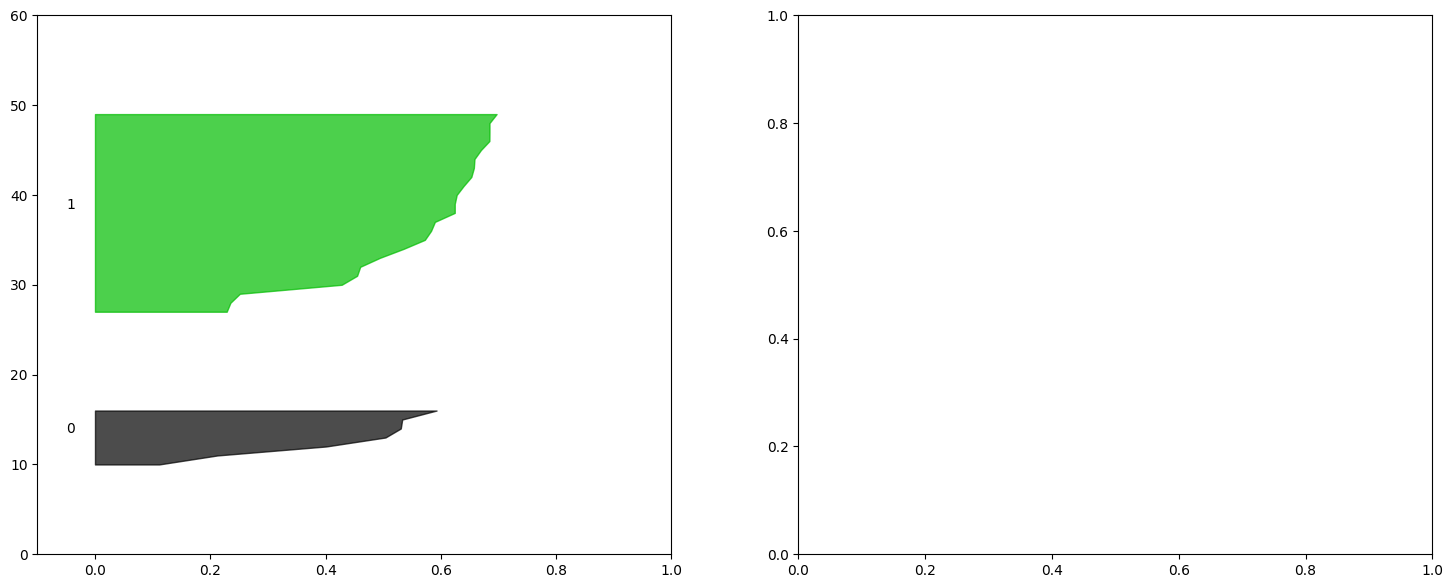

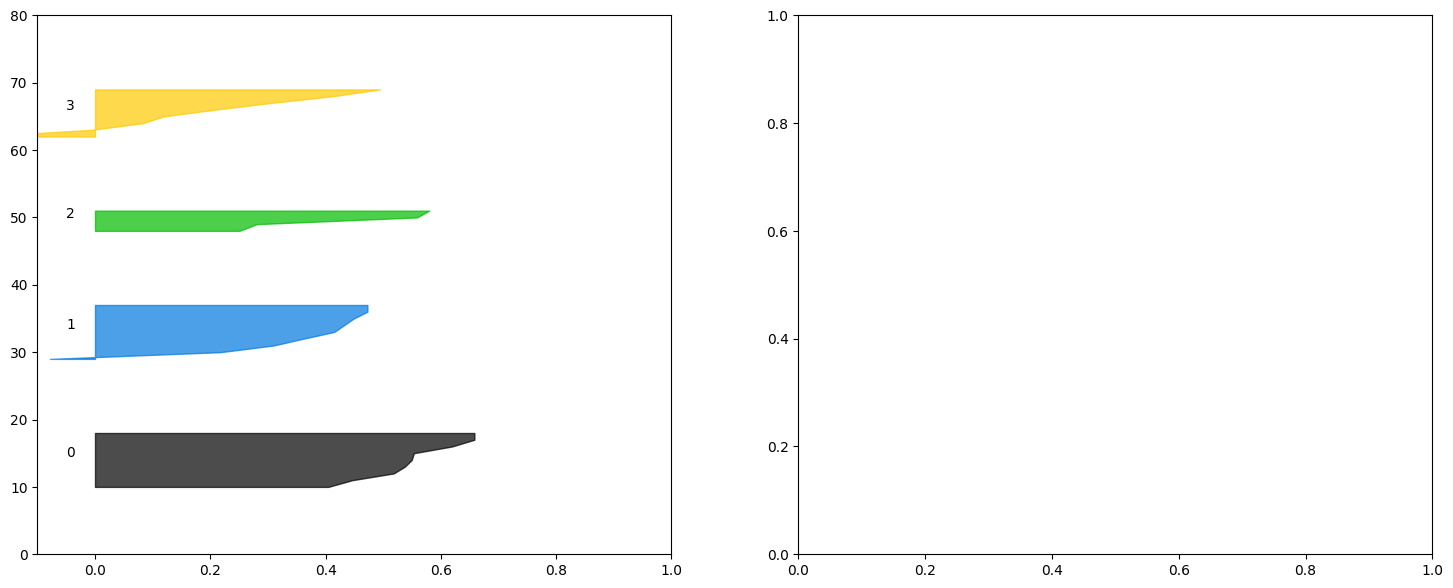

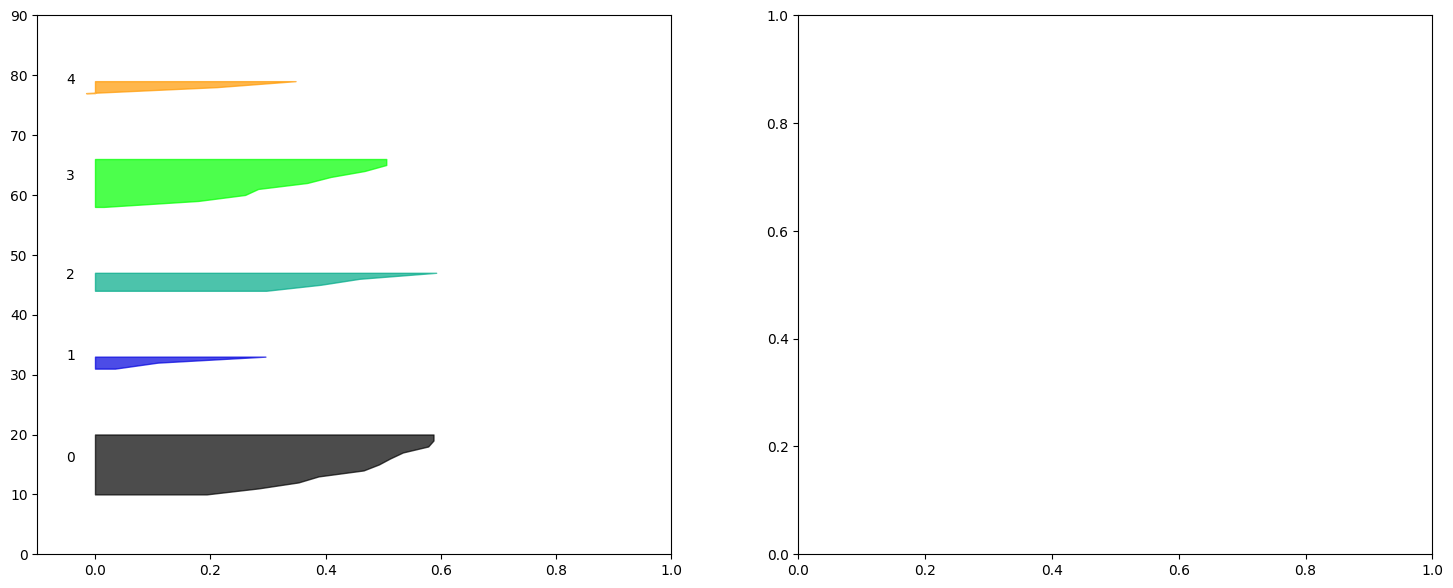

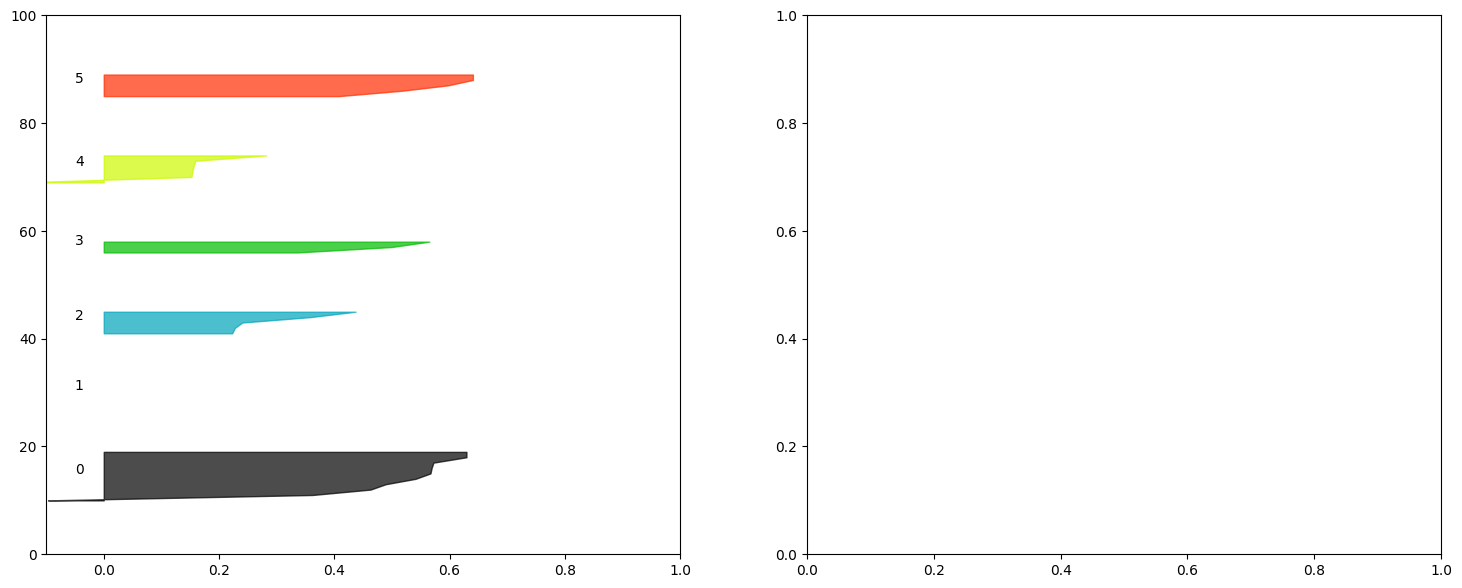

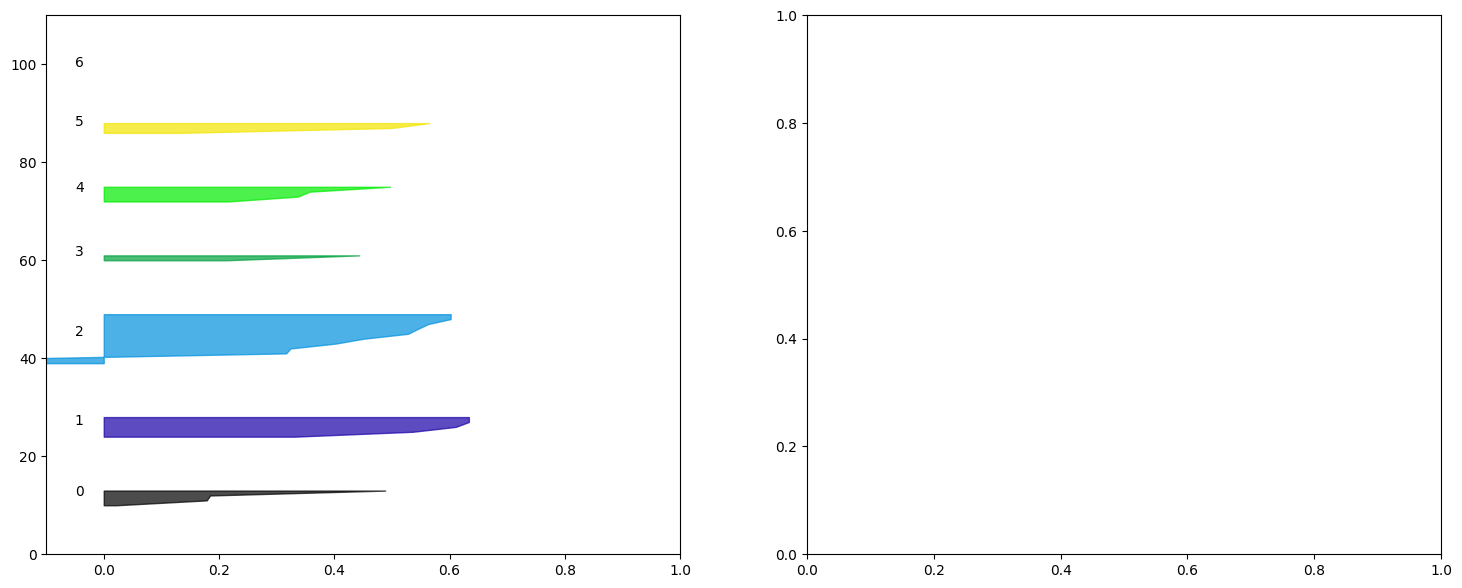

In [18]:
range_clusters = [2,3,4,5,6,7,8]
silhoutte_test(x, range_clusters)

In [19]:
import numpy as np
def purity_score (cluster, classes):
    A = np.c_[(cluster, classes)]
    n_accurate = 0.
    for j in np.unique(A[:,0]):
        z=A[A[:,0]==j, 1]
        x=np.argmax(np.max(z))
        n_accurate += len(z[z==x])
    return n_accurate/A.shape[0]

In [28]:
map = {"TB":0,"B":1}
cluster_kkn = df['KKN'].map(map)
cluster_kkn

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    0
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: KKN, dtype: int64

In [30]:
print('clusters : %s' %labels)
print('clusters : %s' %np.array(cluster_kkn))
purity_score(labels, cluster_kkn)

clusters : [0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
clusters : [0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0]


0.6666666666666666